(0    1366.33
 1    1355.40
 2    1333.10
 3    1342.64
 4    1335.23
 Name: Close, dtype: float64,
 [<matplotlib.lines.Line2D at 0x286551d6f08>])

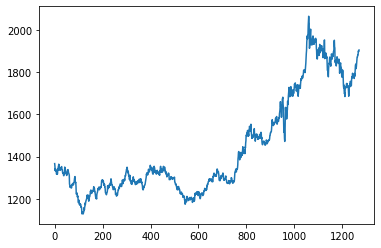

In [35]:
import matplotlib.pyplot as plt
import math
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
import tensorflow 
import keras 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import LSTM
df = pd.read_csv('XAU5Y.csv')
df.head()
df1 = df.reset_index()['Close']
df1.head(),  plt.plot(df1)

In [36]:
scaler = MinMaxScaler(feature_range = (0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1.shape

(1271, 1)

In [ ]:
#train and test 
training_size = int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
train_data

In [38]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0] 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
#reshape again for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [39]:
#LSTM model creation 
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape = (100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_10 (LSTM)               (None, 100, 50)           20200     
_________________________________________________________________
lstm_11 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________
Train on 725 samples, validate on 344 samples
Epoch 1/100
725/725 [==============================] - 4s 6ms/sample - loss: 0.0128 - val_loss: 0.0984
Epoch 2/100
725/725 [==============================] - 1s 2ms/sample - loss: 0.0029 - val_loss: 0.0

In [34]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict)), math.sqrt(mean_squared_error(ytest,test_predict))

ValueError: Error when checking input: expected lstm_6_input to have shape (103, 1) but got array with shape (100, 1)

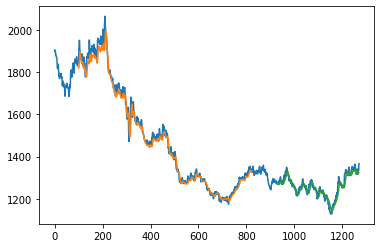

In [24]:
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [25]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [33]:
lst_output=[]
n_steps=100
i=0
while(i<60):
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else: 
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        i=i+1
print(lst_output)

0 day input [0.06408529 0.07016981 0.05900595 0.0569849  0.06409598 0.08976004
 0.09180247 0.08502288 0.09414432 0.10330852 0.10730784 0.09941614
 0.10614226 0.1398905  0.15997263 0.15751315 0.16388639 0.18893024
 0.1864066  0.18010822 0.17090124 0.15914924 0.15728859 0.14972839
 0.14833825 0.15557766 0.14549382 0.14765388 0.14690534 0.15061594
 0.14341931 0.13630823 0.13115403 0.13870354 0.13566662 0.13304675
 0.1403717  0.13762351 0.1347363  0.14807092 0.14977116 0.19592369
 0.20048976 0.20530177 0.20655289 0.21273365 0.22410069 0.22368365
 0.22315967 0.22112794 0.19938834 0.19762394 0.19458702 0.1992921
 0.20804996 0.20389024 0.21326832 0.21327901 0.22447496 0.23183199
 0.23698618 0.21247701 0.21047735 0.19837247 0.19311134 0.19539972
 0.20852047 0.20616793 0.2070127  0.20932247 0.22368365 0.22531973
 0.22786475 0.23950982 0.23562813 0.23296548 0.22565123 0.2219834
 0.22498824 0.23336114 0.22707344 0.22127764 0.22201548 0.24890928
 0.24573335 0.25149707 0.24035459 0.23835493 0.22174

ValueError: cannot reshape array of size 103 into shape (1,100,1)

In [29]:
day_new=np.arange(1,101)
day_pred=np.arange(101,161)
len(df1)

1271

ValueError: x and y must have same first dimension, but have shapes (100,) and (113, 1)

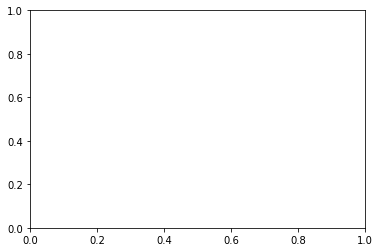

In [30]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

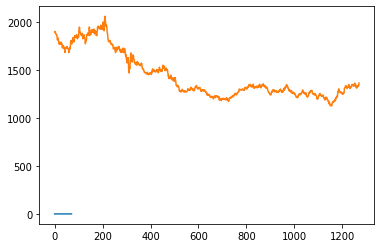

In [31]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)

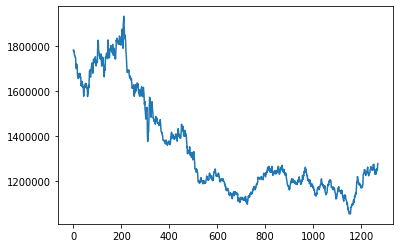

In [32]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)